#irctc code one


In [34]:
import pandas as pd
import numpy as np
import statistics as st
import matplotlib.pyplot as plt
df=pd.read_csv('Lab session1.csv')
df = df.loc[:, ~df.columns.str.contains('Unnamed')]
df = df.dropna()
print(df)

             Date Month  Day     Price      Open      High       Low   Volume  \
0    Jun 29, 2021   Jun  Tue  2,081.85  2,092.00  2,126.90  2,065.05    1.67M   
1    Jun 28, 2021   Jun  Mon  2,077.75  2,084.00  2,112.45  2,068.40  707.73K   
2    Jun 25, 2021   Jun  Fri  2,068.85  2,084.35  2,088.50  2,053.10  475.82K   
3    Jun 24, 2021   Jun  Thu  2,072.95  2,098.00  2,098.00  2,066.00  541.51K   
4    Jun 23, 2021   Jun  Wed  2,078.25  2,102.00  2,111.40  2,072.00  809.62K   
..            ...   ...  ...       ...       ...       ...       ...      ...   
244  Jul 07, 2020   Jul  Tue  1,397.40  1,410.00  1,411.00  1,390.05  480.21K   
245  Jul 06, 2020   Jul  Mon  1,400.75  1,405.50  1,415.50  1,394.00  614.93K   
246  Jul 03, 2020   Jul  Fri  1,405.10  1,415.00  1,425.00  1,398.00  599.49K   
247  Jul 02, 2020   Jul  Thu  1,412.35  1,440.00  1,467.80  1,395.30    2.16M   
248  Jul 01, 2020   Jul  Wed  1,363.05  1,363.65  1,377.00  1,356.00  383.00K   

       Chg%  
0     0.20%  

In [35]:
df['Price'] = df['Price'].str.replace(',', '').str.extract('(\d+\.\d+)').astype(float)

# Calculate the mean and variance of the 'Price' column
mean_price = st.mean(df['Price'])
variance_price = st.variance(df['Price'])

print("Mean of the Price data:", mean_price)
print("Variance of the Price data:", variance_price)

Mean of the Price data: 1560.663453815261
Variance of the Price data: 58732.365352539186


In [36]:
#Select the price data for all Wednesdays and calculate the sample mean. Compare the mean 
#with the population mean and note your observations.
Wed = df[df['Day']=='Wed']
# print(Wed.head())

Wed_mean = st.mean(Wed['Price'])
# print("Sample mean: ",Wed_mean)

# Comparing the sample mean with population mean
if Wed_mean < mean_price:
    print("Mean of price data for all Wednesdays is lesser than the mean of all price")
else:
    print("Mean of price data for all Wednesdays is greater than the mean of all price")

Mean of price data for all Wednesdays is lesser than the mean of all price


In [37]:
# Select the price data for the month of Apr and calculate the sample mean. Compare the
# mean with the population mean and note your observations.
Apr_data = df[df['Month']=='Apr']
Apr_mean = st.mean(Apr_data['Price'])
print("Mean of price of April month: ",Apr_mean)

if Apr_mean < mean_price:
    print("Population mean is greater than the sample mean of April month")
else:
    print("Population mean is greater than the sample mean of April month")

Mean of price of April month:  1698.9526315789474
Population mean is greater than the sample mean of April month


In [38]:
'''Calculate the probability of making a profit on Wednesday.'''
df['Chg%'] = df['Chg%'].str.rstrip('%').astype(float)
profit = df[df['Chg%']>0]
profit_wed = len(Wed)/len(profit) 
# Wed data we have calculated earlier
print("Probability of profit on Wednesday       : ",profit_wed)

Probability of profit on Wednesday       :  0.4032258064516129


In [47]:
# Calculate the number of Wednesdays with profit
wednesday_profit_count = len(df[(df['Day'] == 'Wed') & (df['Chg%'] > 0)])

# Calculate the number of Wednesdays
wednesday_count = len(df[df['Day'] == 'Wed'])

# Calculate the conditional probability
conditional_probability = wednesday_profit_count / wednesday_count

print("The conditional probability of making a profit, given that today is Wednesday, is {:.2%}".format(conditional_probability))


The conditional probability of making a profit, given that today is Wednesday, is 42.00%


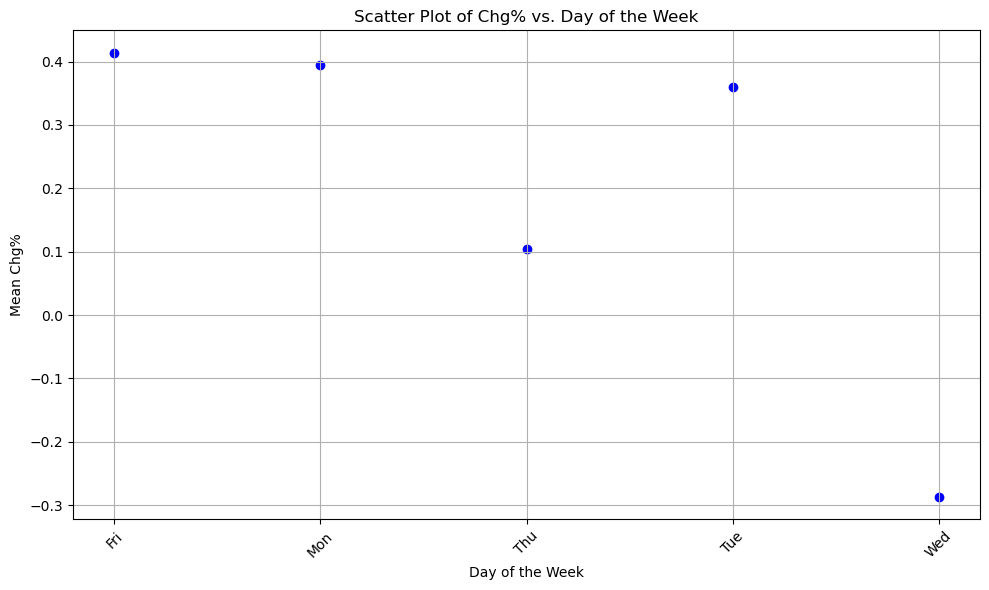

In [48]:
# Group the data by 'Day' and calculate the mean 'Chg%' for each day
daily_mean_chg = df.groupby('Day')['Chg%'].mean()

# Create a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(daily_mean_chg.index, daily_mean_chg.values, marker='o', color='b')
plt.title('Scatter Plot of Chg% vs. Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Mean Chg%')
plt.grid(True)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

# Show the plot
plt.tight_layout()
plt.show()
